In [1]:
#import python library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import csv file
df_raw_data = pd.read_csv("dfall_clean.csv")

In [3]:
# Before cleaning, a separate copy of the original dataset was created to keep the raw data safe.

df = df_raw_data.copy()

In [4]:
df

,id,title,company_name,category_label,category_tag,country,location_display,location_area,latitude,longitude,contract_type,contract_time,salary_min,salary_max,salary_mid,salary_is_predicted,created_dt,created_date,redirect_url,adref
0,5410474609,Mechanical Pipefitter,Dodd Group,Trade & Construction Jobs,trade-construction-jobs,United Kingdom,"King's Lynn, Norfolk",UK > Eastern England > Norfolk > King's Lynn,52.751999,0.395357,permanent,full_time,40518.74,40518.74,40518.74,1,2025-09-22 09:28:13+00:00,22-09-2025,https://www.adzuna.co.uk/jobs/details/54104746...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTQxMDQ3NDYwOSIsI...
1,5381519011,International Trade Policy Editor [Startup Pol...,Applio Ventures,Graduate Jobs,graduate-jobs,United Kingdom,"London, UK",UK > London,NaN,NaN,permanent,full_time,64000.00,64000.00,64000.00,0,2025-09-03 21:20:59+00:00,03-09-2025,https://www.adzuna.co.uk/jobs/details/53815190...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTM4MTUxOTAxMSIsI...
2,5389371380,Domestic Cleaner,Maid2Clean Suffolk Ltd,Domestic help & Cleaning Jobs,domestic-help-cleaning-jobs,United Kingdom,"Diss, Norfolk",UK > Eastern England > Norfolk > Diss,52.377602,1.106380,permanent,part_time,13.00,13.00,13.00,0,2025-09-08 15:49:25+00:00,08-09-2025,https://www.adzuna.co.uk/jobs/details/53893713...,eyJhbGciOiJIUzI1NiJ9.eyJzIjoiRWtwZjc5cWI4QkdZM...
3,5403097985,Early Years BABY Room Leader,Jesters Childcare Essex,Teaching Jobs,teaching-jobs,United Kingdom,UK,UK,NaN,NaN,permanent,full_time,26707.00,29494.00,28100.50,0,2025-09-17 15:00:12+00:00,17-09-2025,https://www.adzuna.co.uk/jobs/details/54030979...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTQwMzA5Nzk4NSIsI...
4,5400306117,Senior Back-End Engineer,Eligible Limited,IT Jobs,it-jobs,United Kingdom,UK,UK,NaN,NaN,permanent,full_time,80000.00,NaN,80000.00,0,2025-09-15 17:51:23+00:00,15-09-2025,https://www.adzuna.co.uk/jobs/details/54003061...,eyJhbGciOiJIUzI1NiJ9.eyJzIjoiRWtwZjc5cWI4QkdZM...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5416682608,Technicien SAV 80-100% CDI (H/F/D),Adecco,Sonstige/Allgemeine Stellen,other-general-jobs,Switzerland,Schweiz,Schweiz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2025-09-27 02:26:28+00:00,27-09-2025,https://www.adzuna.ch/details/5416682608?utm_m...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTQxNjY4MjYwOCIsI...
3996,5415370352,German Speaking Support for Social Media - Ins...,Patrique Mercier Recruitment JP,Sonstige/Allgemeine Stellen,other-general-jobs,Switzerland,Schweiz,Schweiz,NaN,NaN,NaN,full_time,20.00,23.00,21.50,0,2025-09-26 15:24:32+00:00,26-09-2025,https://www.adzuna.ch/details/5415370352?utm_m...,eyJhbGciOiJIUzI1NiJ9.eyJzIjoiNkxnSGRkdWI4Qkdad...
3997,5285834665,Konstrukteur EFZ (w/m) Lehrabgänger willkommen,DAS PERSONAL.,Stellen aus Handel & Bau,trade-construction-jobs,Switzerland,"Martigny, Kanton Wallis",Schweiz > Kanton Wallis > Martigny,46.269920,7.153290,NaN,NaN,NaN,NaN,NaN,0,2025-07-04 22:56:55+00:00,04-07-2025,https://www.adzuna.ch/details/5285834665?utm_m...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTI4NTgzNDY2NSIsI...
3998,5285834666,Dachdecker EFZ oder EBA (Lehrabgänger willkommen),DAS PERSONAL.,Stellen aus Handel & Bau,trade-construction-jobs,Switzerland,Schweiz,Schweiz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2025-07-04 22:56:55+00:00,04-07-2025,https://www.adzuna.ch/details/5285834666?utm_m...,eyJhbGciOiJIUzI1NiJ9.eyJzIjoiNkxnSGRkdWI4Qkdad...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   4000 non-null   int64  
 1   title                4000 non-null   object 
 2   company_name         3786 non-null   object 
 3   category_label       4000 non-null   object 
 4   category_tag         4000 non-null   object 
 5   country              4000 non-null   object 
 6   location_display     4000 non-null   object 
 7   location_area        4000 non-null   object 
 8   latitude             3257 non-null   float64
 9   longitude            3257 non-null   float64
 10  contract_type        846 non-null    object 
 11  contract_time        985 non-null    object 
 12  salary_min           1544 non-null   float64
 13  salary_max           1535 non-null   float64
 14  salary_mid           1544 non-null   float64
 15  salary_is_predicted  4000 non-null   i

In [6]:
df.shape

(4000, 20)

In [7]:
#Dropped latitude ,longitude and location_display was out of scope for this project.
#Dropped created_dt due to duplicate date column
df= df.drop(columns= ['latitude','longitude','location_display','created_dt'])


In [8]:
df.shape

(4000, 16)

In [9]:
df.isnull().sum()

id                        0
title                     0
company_name            214
category_label            0
category_tag              0
country                   0
location_area             0
contract_type          3154
contract_time          3015
salary_min             2456
salary_max             2465
salary_mid             2456
salary_is_predicted       0
created_date              0
redirect_url              0
adref                     0
dtype: int64

In [10]:
#empty or null row data are filled with unknown 

df['company_name'] = df['company_name'].fillna("Unknown Company ")
df['contract_time'] = df['contract_time'].fillna("Unknown ")

In [11]:
df.isnull().sum()

id                        0
title                     0
company_name              0
category_label            0
category_tag              0
country                   0
location_area             0
contract_type          3154
contract_time             0
salary_min             2456
salary_max             2465
salary_mid             2456
salary_is_predicted       0
created_date              0
redirect_url              0
adref                     0
dtype: int64

# DATASET OVERVIEW

In [12]:
# FREQUENCY ANALYSIS

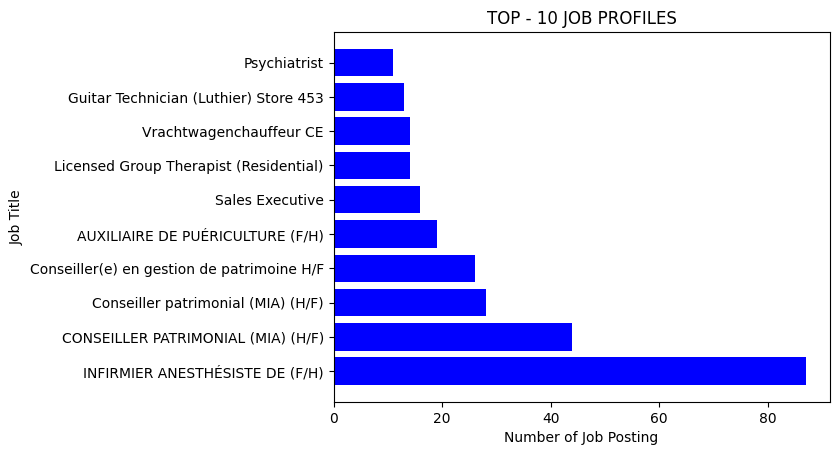

In [28]:
#top 10 job profile

no_job_title = df['title'].value_counts().head(10)
plt.barh(no_job_title.index,no_job_title.values,color="blue")
plt.title("TOP - 10 JOB PROFILES")
plt.xlabel("Number of Job Posting")
plt.ylabel("Job Title")
plt.savefig('image/topjob_profile.png',dpi =200, bbox_inches='tight')

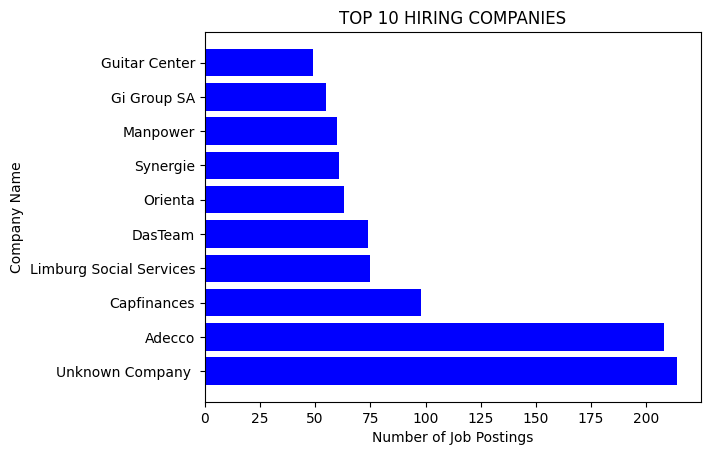

In [37]:
#top 10 hiring companies
hc = df['company_name'].value_counts().head(10)
plt.barh(hc.index,hc.values,color="blue")
plt.title("TOP 10 HIRING COMPANIES")
plt.xlabel("Number of Job Postings")
plt.ylabel("Company Name")
plt.savefig('image/top_hiring_company.png', dpi = 200,bbox_inches ='tight')

In [15]:
#Top country job locations
df['country'].value_counts()

#Job postings are evenly distributed across countries, so country-wise analysis was not informative and was excluded.

country
United Kingdom    500
USA               500
Germany           500
France            500
Netherlands       500
Italy             500
Spain             500
Switzerland       500
Name: count, dtype: int64

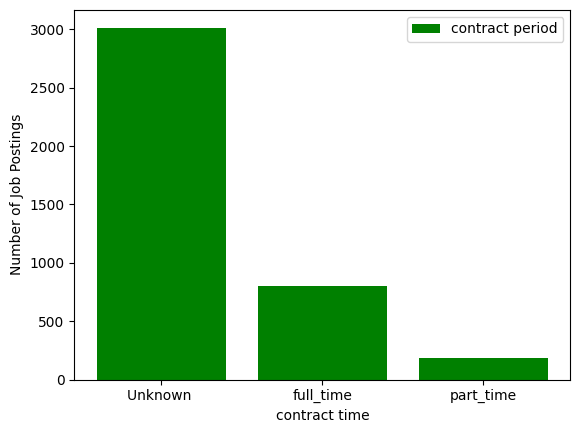

In [26]:
#CONTRACT ANALYSIS
period = df['contract_time'].value_counts()
plt.bar(period.index,period.values,label="contract period",color="green")
plt.xlabel("contract time")
plt.ylabel("Number of Job Postings")
plt.legend()
plt.savefig('image/contract_period.png', dpi = 200)

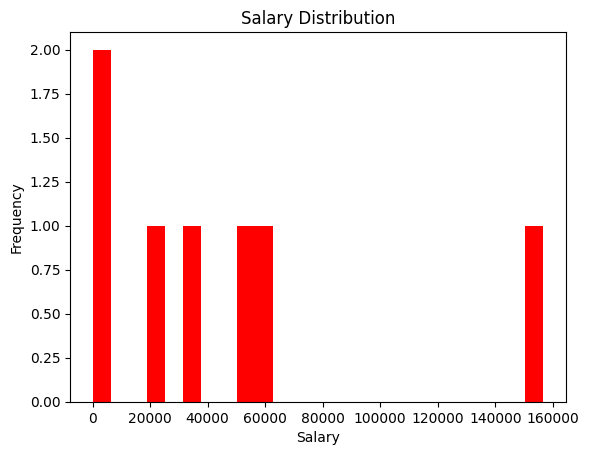

In [36]:
#salary and number of jobs analysis 
salary_df =df[df['salary_mid'].notna()] #working with only given data
salary_int = salary_df['salary_mid'].describe().astype(int)
salary_plot = salary_int[salary_int <200000] #Extreme salary outliers were excluded from the visualization to better understand the distribution of typical salaries.
plt.hist(salary_plot,bins=25,color="red")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary Distribution")
#plt.show()
plt.savefig('image/salary.png',dpi = 200,bbox_inches='tight')